In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         245 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.5.0-py_0

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge

In [3]:
data1 = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [4]:
data2 = pd.read_csv('bank/bank-full.csv',sep=';')

In [6]:
data3 = pd.read_csv('bank/bank.csv',sep=';')

In [4]:
data4 = pd.read_csv('bank-additional/bank-additional.csv',sep=';')

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [172]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [173]:
data1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [18]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
data1['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

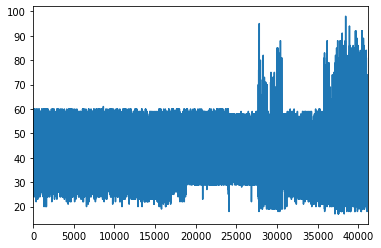

In [34]:
data1['age'].plot()

In [5]:
df1 = data1.copy()

In [6]:
df1.housing[df1.housing == 'no'] = 0
df1.housing[df1.housing == 'yes'] = 1
df1.housing[df1.housing == 'unknown'] = 2

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

In [7]:
df1.loan[df1.loan == 'no'] = 0
df1.loan[df1.loan == 'yes'] = 1
df1.loan[df1.loan == 'unknown'] = 2

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

In [7]:
df1[['housing','loan']]

,housing,loan
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
41183,1,0
41184,0,0
41185,1,0
41186,0,0


In [74]:
df1['housing'].count()

41188

In [16]:
df1.set_index(['housing','loan']).count(level='housing')

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,,,,,,,,,,
0,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622
1,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576
2,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990


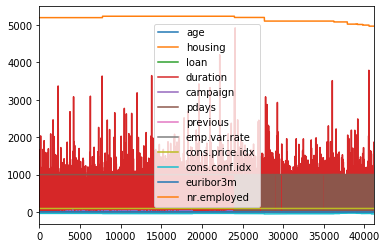

In [8]:
df1.plot()

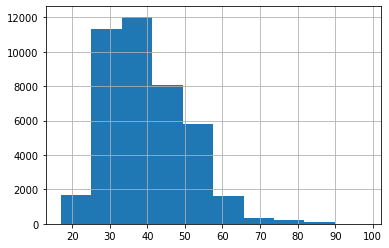

In [11]:
df1.age.hist()

In [15]:
df1['housing'].isnull().values.any()

False

In [21]:
df1 = df1.astype({'housing':'int64','loan':'int64'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c73d50>,
      dtype=object)

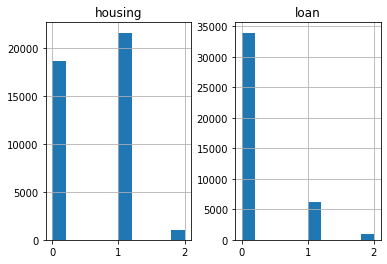

In [22]:
df1[['housing','loan']].hist()

In [30]:
new_df1.groupby(['y']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


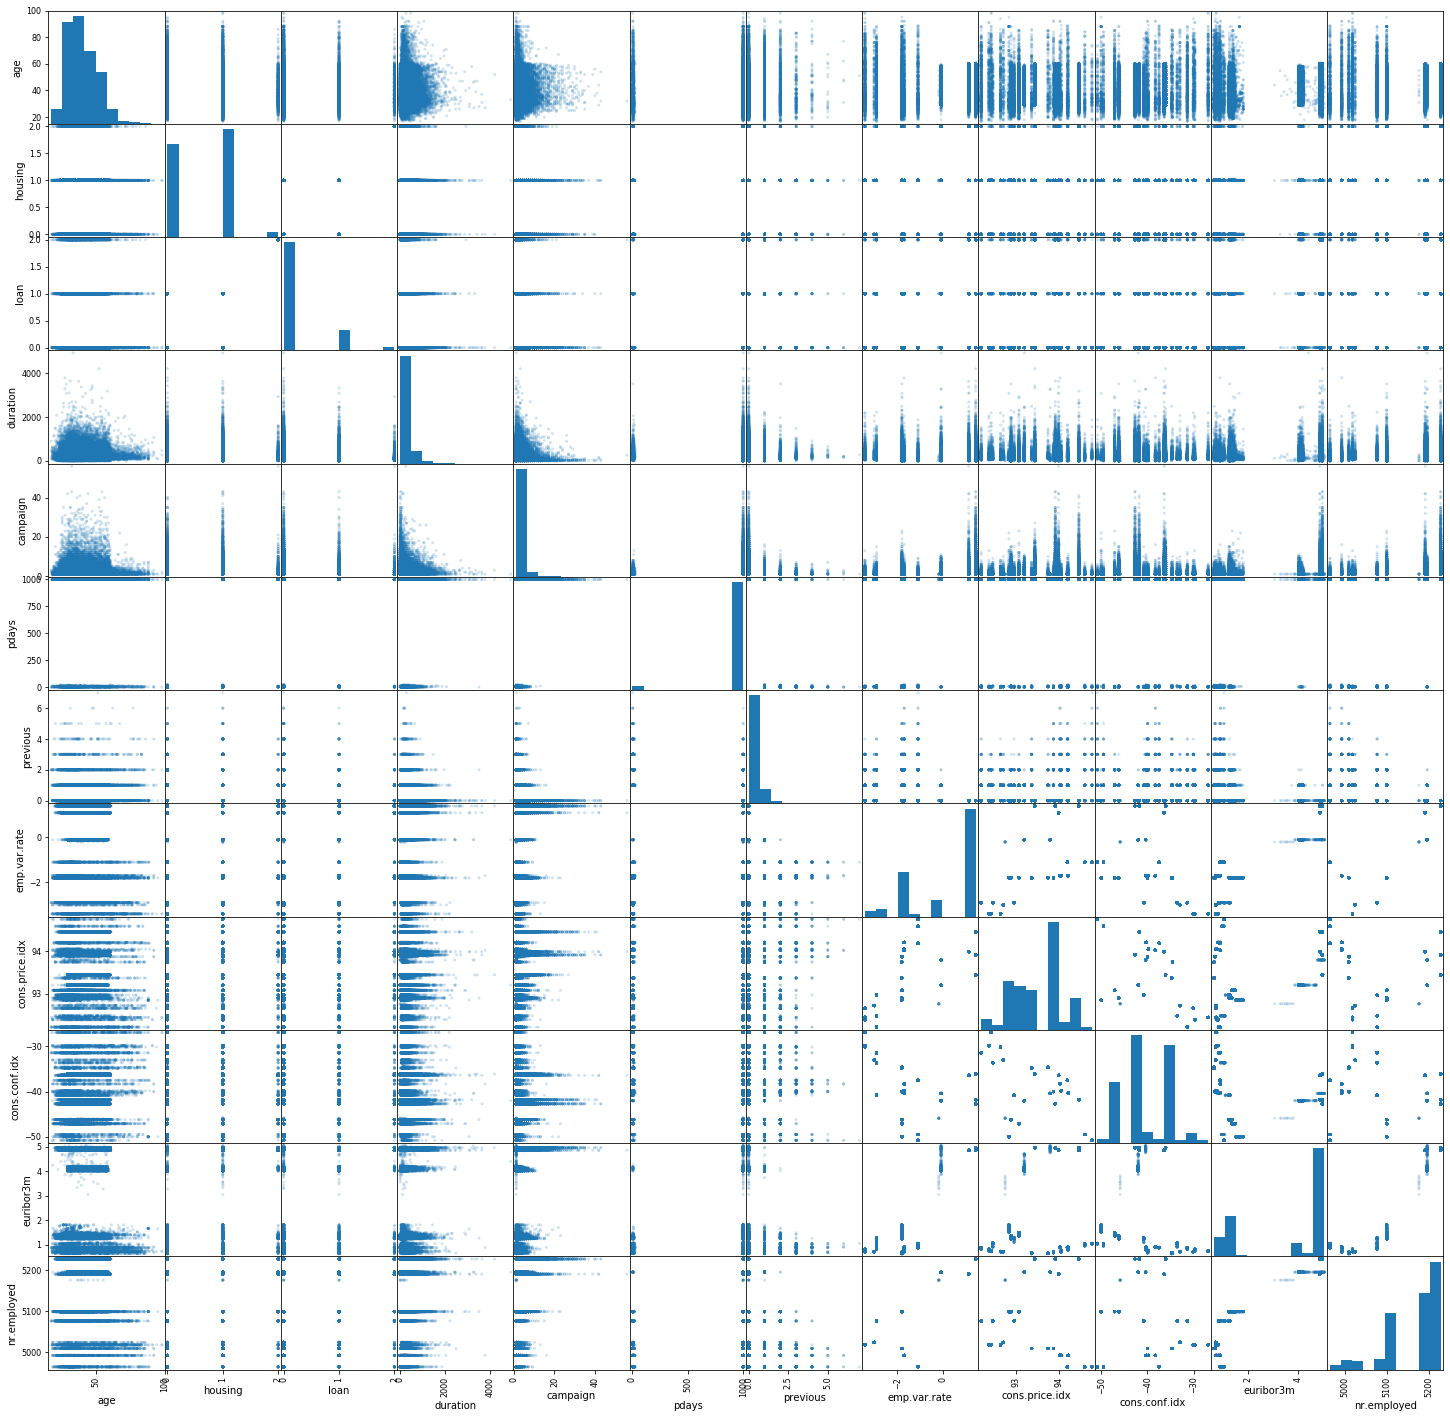

In [34]:
scatter_matrix(new_df1,alpha=0.2, figsize = (25,25));

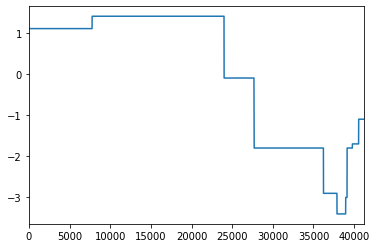

In [35]:
df1[['emp.var.rate']].plot()

In [36]:
df1['emp.var.rate'].unique() #employment variation rate

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [37]:
df1['cons.price.idx'].unique() #consumer price index - monthly indicator

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [38]:
df1['cons.conf.idx'].unique() #consumer confidence index - monthly indicator

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [43]:
len(df1['nr.employed'].unique()) #number of employees - quarterly indicator

11

In [45]:
(df1['euribor3m'].unique()) #euribor 3 month rate - daily indicator

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [55]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d687790>]],
      dtype=object)

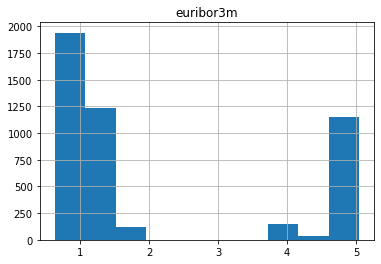

In [10]:
df1[['euribor3m','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12055a850>]],
      dtype=object)

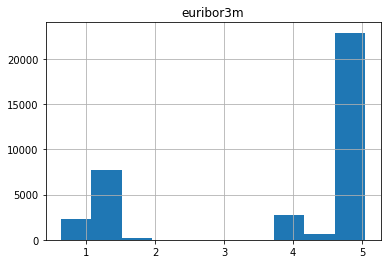

In [15]:
df1[['euribor3m','y']][df1['y']=='no'].hist() # rate started dropping from 5% (2008)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e91b250>]],
      dtype=object)

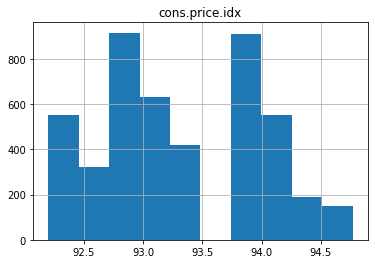

In [11]:
df1[['cons.price.idx','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120875890>]],
      dtype=object)

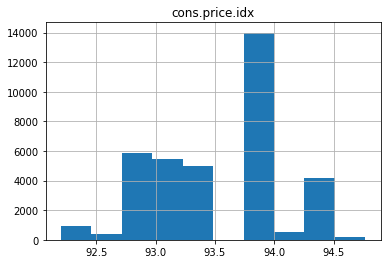

In [12]:
df1[['cons.price.idx','y']][df1['y']=='no'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202d7490>]],
      dtype=object)

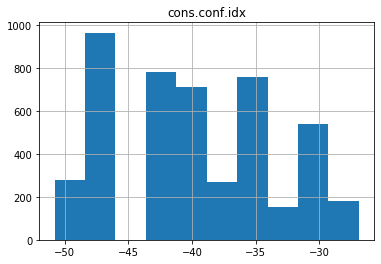

In [13]:
df1[['cons.conf.idx','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1203a1f10>]],
      dtype=object)

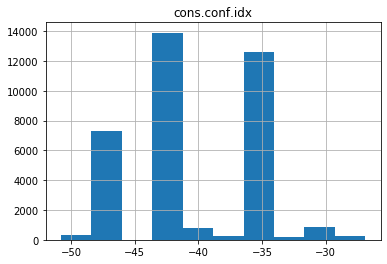

In [14]:
df1[['cons.conf.idx','y']][df1['y']=='no'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120154dd0>,
      dtype=object)

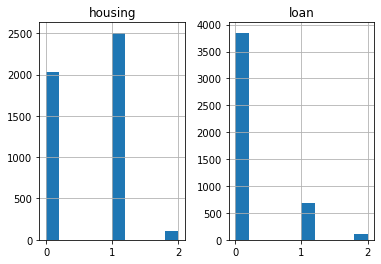

In [23]:
df1[['housing','loan','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120424fd0>,
      dtype=object)

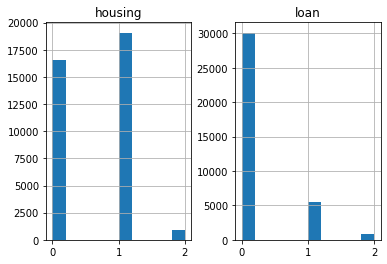

In [24]:
df1[['housing','loan','y']][df1['y']=='no'].hist()

### LogisticRegression

In [37]:
new_df1 = df1.copy()

In [41]:
new_df1.y[new_df1.y == 'yes'] = 1
new_df1.y[new_df1.y == 'no'] = 0
new_df1 = new_df1.astype({'y':'int64'})

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(8), object(8)
memory usage: 

In [181]:
X = new_df1[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']]
y = new_df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(class_weight='balanced',random_state = 0)
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
y_train[y_train == 1]

21035    1
40604    1
36816    1
37042    1
41049    1
        ..
15346    1
40042    1
38961    1
17074    1
34389    1
Name: y, Length: 3519, dtype: int64

In [101]:
from sklearn.metrics import log_loss
train_pred_probs = model.predict_proba(X)
log_loss(y, train_pred_probs, normalize=False)


12174.49371903012

In [103]:
print(model.coef_)

[[ 0.00091776 -0.13870224  0.41421569  0.04327017 -0.1959103  -0.00747294
  -0.05123705]]


In [183]:
model.score(X_test,y_test)

0.7170049528989026

In [74]:
from sklearn.metrics import accuracy_score

In [184]:
(model.predict(X_test) == y_test).mean()

0.7170049528989026

In [185]:
pd.crosstab(y_test, model.predict(X_test), rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,6581,2572
1,342,802


In [180]:
accuracy_score(y_test, model.predict(X_test))

0.7245799747499272

In [89]:
new_df1.previous

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: previous, Length: 41188, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a267f68d0>]],
      dtype=object)

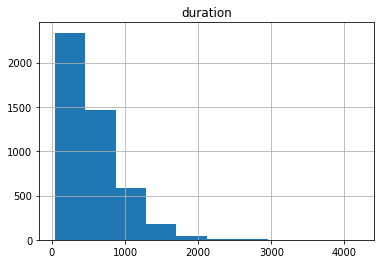

In [93]:
df1[['duration','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26b2a650>]],
      dtype=object)

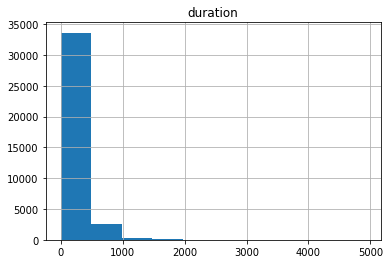

In [97]:
df1[['duration','y']][df1['y']=='no'].hist()

In [153]:
X = new_df1[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']]
y = new_df1['y']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)


In [156]:
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [120]:
print(sorted(Counter(y_resampled).items()))

[(0, 3519), (1, 3519)]


step1: do train test split
step2: keep the test for final test
step3: balance the data by undersampleing the majority class.
step4: train test split over the balance data
step5: check the performance for find the best model.
step6: find the performance with the test data in step2.

In [158]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled)

In [198]:
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train1, y_train1)
probabilities = model1.predict_proba(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [176]:
probabilities


array([[0.55496005, 0.44503995],
       [0.50080188, 0.49919812],
       [0.41203066, 0.58796934],
       ...,
       [0.32412891, 0.67587109],
       [0.27146753, 0.72853247],
       [0.65288251, 0.34711749]])

In [187]:
model1.score(X_test1,y_test1) # undersampling

0.7166476624857469

In [199]:
pd.crosstab(y_test1, model.predict(X_test1), rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,470,406
1,260,618


In [145]:
from imblearn.over_sampling import RandomOverSampler

In [192]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [193]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res)

In [201]:
model2 = LogisticRegression(random_state=0)
model2.fit(X_train2, y_train2)
probabilities = model1.predict_proba(X_test2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [195]:
model2.score(X_test2,y_test2) #oversampling

0.7194480946123522

In [202]:
pd.crosstab(y_test2, model.predict(X_test2), rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,4988,1906
1,1937,4867


Precision = PPV $= \frac{TP}{TP+FP}$

Sensitivity = Recall = TPR $= \frac{TP}{TP+FN}$


### GridSearch

In [203]:
from sklearn.model_selection import GridSearchCV

In [216]:
model3 = LogisticRegression()

In [217]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
search = GridSearchCV(model3,param_grid,cv=10)
search.fit(X_train2,y_train2)
print(search.best_params_)

ValueError: Invalid parameter kernel for estimator LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [207]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [ ]:
from sklearn import metrics
y = 
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)